# Weather Forecast Data Analysis and Rain Prediction

This notebook demonstrates the process of loading, preprocessing, and analyzing weather forecast data to build a model for predicting rain.

## Data Loading and Initial Inspection

First, we load the weather forecast data from a CSV file into a pandas DataFrame and display the first few rows to understand its structure and content.

## Data Preprocessing

Before training a model, we need to preprocess the data. This involves separating the target variable ('Rain') and applying appropriate transformations to the features. Numerical features are scaled using `StandardScaler`, and categorical features are one-hot encoded using `OneHotEncoder`.

## Data Splitting

We split the preprocessed data into training and testing sets to train and evaluate the model.

## Model Training

We train a Logistic Regression model on the training data. Logistic Regression is a suitable choice for binary classification tasks like predicting rain (yes/no).

## Model Evaluation

After training, we evaluate the model's performance on the test set using various metrics: accuracy, precision, recall, and F1-score.

## Confusion Matrix

To further understand the model's performance, we generate and display a confusion matrix. The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives.

## Data Loading and Initial Inspection

First, we load the weather forecast data from a CSV file into a pandas DataFrame and display the first few rows to understand its structure and content.

In [11]:
import pandas as pd

df = pd.read_csv('/weather_forecast_data.csv')
display(df.head())

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614190,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


## Data Preprocessing

Before training a model, we need to preprocess the data. This involves separating the target variable ('Rain') and applying appropriate transformations to the features. Numerical features are scaled using `StandardScaler`, and categorical features are one-hot encoded using `OneHotEncoder`.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Identify categorical and numerical columns
categorical_features = ['Rain'] # Target variable, will be separated later
numerical_features = ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']

# Separate target variable
X = df.drop('Rain', axis=1)
y = df['Rain']

# Identify categorical features in X
categorical_features_X = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features_X = X.select_dtypes(include=['number']).columns.tolist()


# Create preprocessing pipelines for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_X),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_X)
    ])

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Convert y to numerical if it's not already
y_processed = y.astype('category').cat.codes

display(X_processed[:5])
display(y_processed[:5])

array([[ 0.1554307 ,  1.26539348, -0.44481385,  0.02897213,  0.8947143 ],
       [ 0.72322527, -0.89507374, -0.6841429 , -1.53407371, -1.07457032],
       [ 0.33954662,  0.93859882, -1.47673073, -1.19524633, -0.35066253],
       [ 0.14201761,  0.50227007, -0.49413828,  0.60435517, -1.56892365],
       [-0.27170116,  1.62959946, -0.91057073, -0.06805787, -1.65840641]])

,0
0,1
1,0
2,0
3,1
4,0


## Data Splitting

We split the preprocessed data into training and testing sets to train and evaluate the model.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)

display(X_train[:5])
display(X_test[:5])
display(y_train[:5])
display(y_test[:5])

array([[-1.7172657 ,  0.69694397, -0.85227156, -0.67901423,  0.95726173],
       [ 1.57306263, -1.5790241 , -0.46712377,  1.52807531,  0.67744116],
       [-1.00220137,  0.88540581,  0.13660376, -0.99405545,  1.5808803 ],
       [-0.73989306,  0.6083021 ,  0.6531078 ,  0.21491197,  1.35123931],
       [-0.42390141,  1.44181946, -1.42128607,  0.08826995,  0.71897457]])

array([[ 0.70227608, -1.58608092,  1.45180596, -0.93657088, -0.28778275],
       [-0.21122997, -0.87234933,  0.96284022,  0.21834078,  1.29304248],
       [ 0.02714063,  0.29695002, -1.70800035,  0.01425071,  0.40492142],
       [ 1.35926605,  1.73283489, -0.65525733,  1.6303788 ,  0.97729904],
       [ 1.37609523, -0.89759571, -0.41611258, -0.24904391, -1.65675701]])

,0
2055,0
1961,0
1864,0
2326,1
461,1


,0
1447,0
1114,0
1064,1
2287,0
1537,0


## Model Training

We train a Logistic Regression model on the training data. Logistic Regression is a suitable choice for binary classification tasks like predicting rain (yes/no).

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Model Evaluation

After training, we evaluate the model's performance on the test set using various metrics: accuracy, precision, recall, and F1-score.

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9320
Precision: 0.7347
Recall: 0.6316
F1-score: 0.6792


## Confusion Matrix

To further understand the model's performance, we generate and display a confusion matrix. The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives.

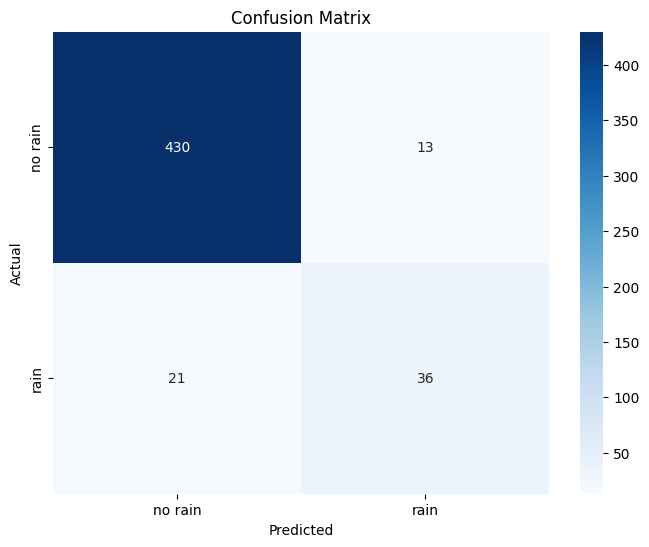

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['no rain', 'rain'], yticklabels=['no rain', 'rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()